### Carga e Transformações nos Dados

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Carregando os dados
df = pd.read_csv("dados/dados_merge.csv", header=None)

#Definindo os nomes das colunas 
colunas = [
    "venda_id", "data_venda", "produto_id", "cliente_id", "quantidade",
    "preco_unitario", "desconto", "valor_total", "loja_id", "canal_venda",
    "metodo_pagamento", "dia_semana", "mes", "ano", "trimestre", "nome_cliente",
    "idade", "genero", "cep", "data_cadastro", "frequencia_compra", "nome_produto",
    "categoria_produto", "subcategoria_produto", "custo", "preco", "marca"
]

df.columns = colunas

#Convertendo para os tipos de dados apropriados
#Primeiro vou verificar quais são os valores na coluna data_venda
print(df["data_venda"].head())

#Agora vou tentar converter a data com diferentes formatos para não dar b.o futuramente nas análises
df["data_venda"] = pd.to_datetime(df["data_venda"], errors='coerce')

#Caso der b.o, posso especificar o formato da data no "format"
# df["data_venda"] = pd.to_datetime(df["data_venda], format='%Y-%m-%d', errors='coerce')

#Convertendo as outras datas
df["data_cadastro"] = pd.to_datetime(df["data_cadastro"], errors='coerce')

#Convertendo os campos numéricos
df["valor_total"] = pd.to_numeric(df["valor_total"], errors='coerce')
df["quantidade"] = pd.to_numeric(df["quantidade"], errors='coerce')
df["idade"] = pd.to_numeric(df["idade"], errors='coerce')

#Verificando se ainda há dados nulos após a conversão
print(df.isnull().sum())


0    data_venda
1    2024-11-01
2    2024-05-12
3    2025-03-06
4    2024-04-04
Name: data_venda, dtype: object
venda_id                0
data_venda              1
produto_id              0
cliente_id              0
quantidade              1
preco_unitario          0
desconto                0
valor_total             1
loja_id                 0
canal_venda             0
metodo_pagamento        0
dia_semana              0
mes                     0
ano                     0
trimestre               0
nome_cliente            0
idade                   1
genero                  0
cep                     0
data_cadastro           1
frequencia_compra       0
nome_produto            0
categoria_produto       0
subcategoria_produto    0
custo                   0
preco                   0
marca                   0
dtype: int64


### Análise Exploratória

#### Análise de Vendas por Mês

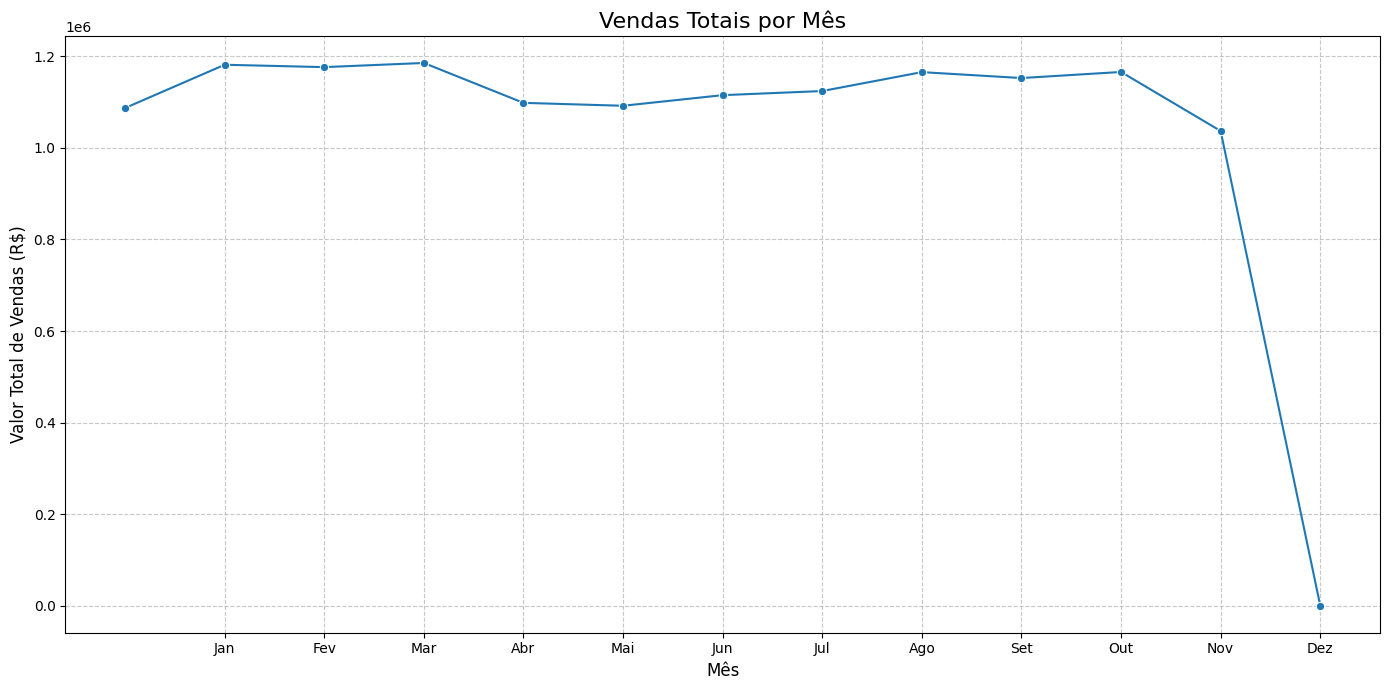

In [43]:
plt.figure(figsize=(14, 7))
sns.lineplot(x="mes", y="valor_total", 
             data=df.groupby(["mes"])["valor_total"].sum().reset_index(),
             marker='o', color='tab:blue')
plt.title("Vendas Totais por Mês", fontsize=16)
plt.xlabel("Mês", fontsize=12)
plt.ylabel("Valor Total de Vendas (R$)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(range(1, 13), ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun',
                          'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])
plt.tight_layout()
plt.show()

### Análise de Vendas Por Categoria de Produto

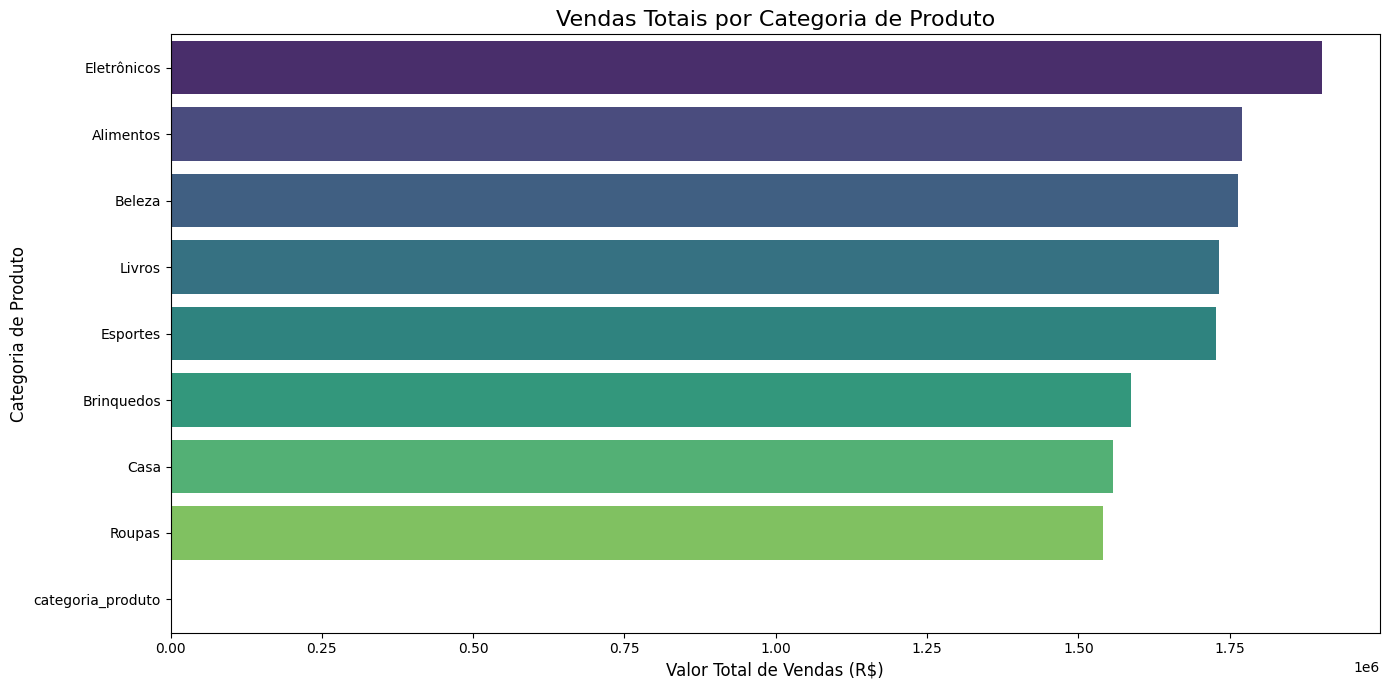

In [44]:
plt.figure(figsize=(14, 7))
category_sales = df.groupby(["categoria_produto"])["valor_total"].sum().sort_values(ascending=False).reset_index()
sns.barplot(x="valor_total", y="categoria_produto", data=category_sales,
            palette="viridis")
plt.title("Vendas Totais por Categoria de Produto", fontsize=16)
plt.xlabel("Valor Total de Vendas (R$)", fontsize=12)
plt.ylabel("Categoria de Produto", fontsize=12)
plt.tight_layout()
plt.show()

### Análise de Vendas por Canal de Venda

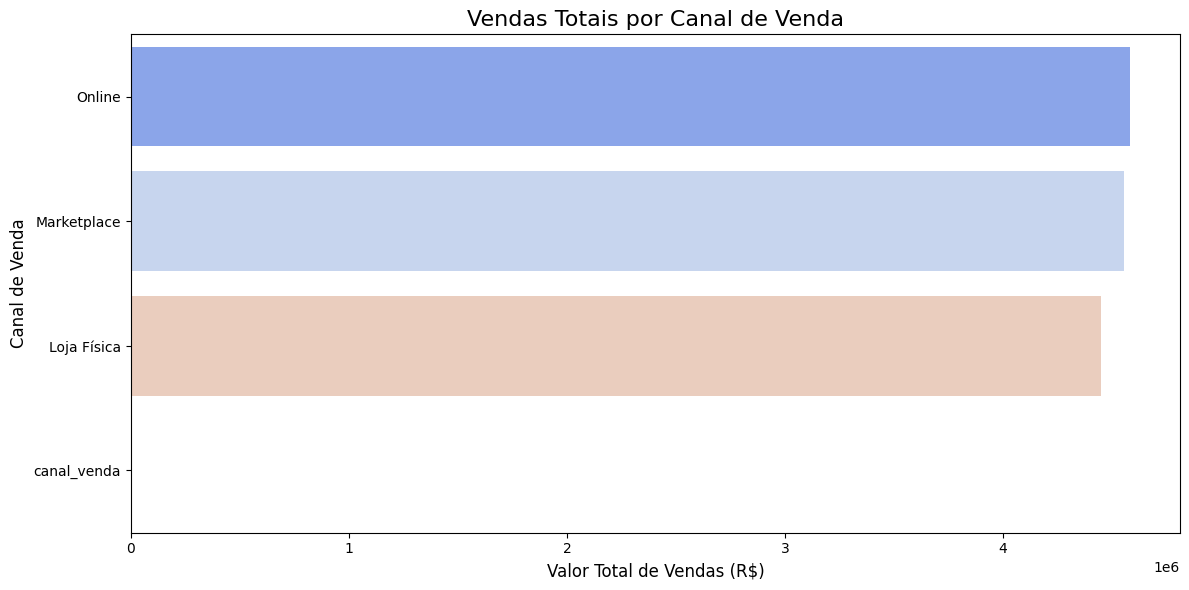

In [45]:
plt.figure(figsize=(12, 6))
channel_sales = df.groupby(["canal_venda"])["valor_total"].sum().reset_index()
sns.barplot(x="valor_total", y="canal_venda", data=channel_sales.sort_values(by="valor_total", ascending=False),
            palette="coolwarm")
plt.title("Vendas Totais por Canal de Venda", fontsize=16)
plt.xlabel("Valor Total de Vendas (R$)", fontsize=12)
plt.ylabel("Canal de Venda", fontsize=12)
plt.tight_layout()
plt.show()

### Análise de Vendas por Método de Pagamento

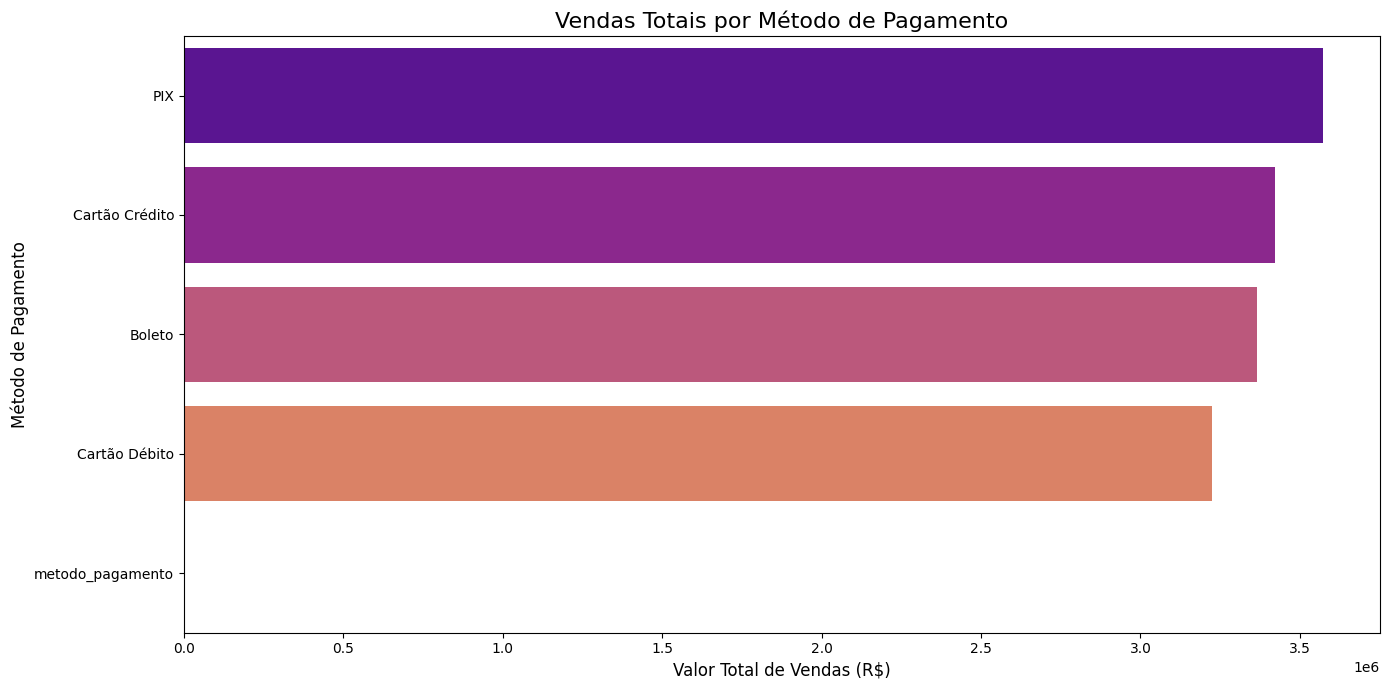

In [46]:
plt.figure(figsize=(14, 7))
payment_method_sales = df.groupby(["metodo_pagamento"])["valor_total"].sum().reset_index()
sns.barplot(x="valor_total", y="metodo_pagamento", data=payment_method_sales.sort_values(by="valor_total", ascending=False),
            palette="plasma")
plt.title("Vendas Totais por Método de Pagamento", fontsize=16)
plt.xlabel("Valor Total de Vendas (R$)", fontsize=12)
plt.ylabel("Método de Pagamento", fontsize=12)
plt.tight_layout()
plt.show()

### Análise de Clientes

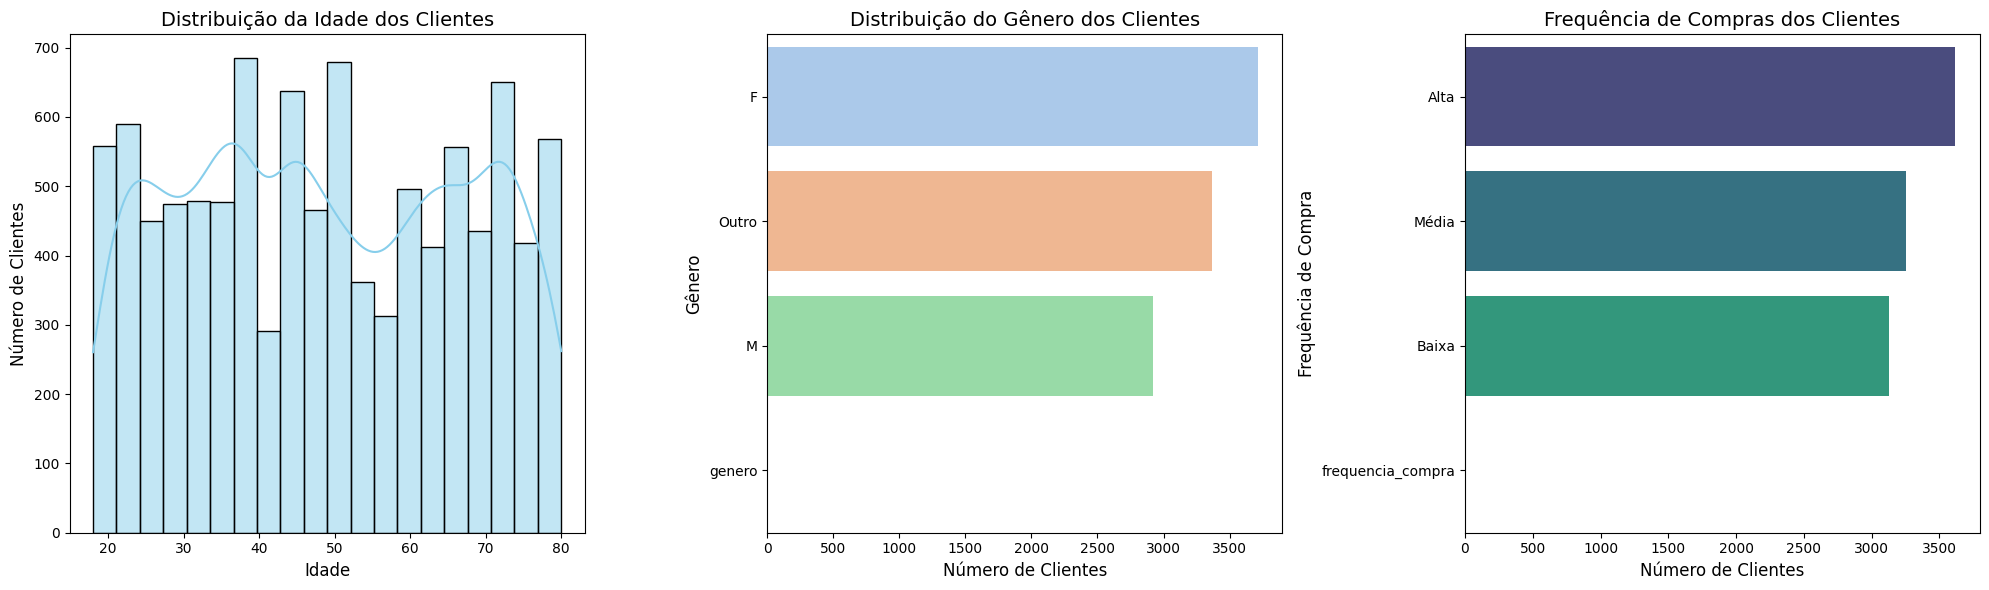

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

#Distribuição da idade dos clientes
sns.histplot(data=df, x="idade", bins=20, kde=True, ax=axes[0], color='skyblue')
axes[0].set_title("Distribuição da Idade dos Clientes", fontsize=14)
axes[0].set_xlabel("Idade", fontsize=12)
axes[0].set_ylabel("Número de Clientes", fontsize=12)

#Distribuição do gênero dos clientes
sns.countplot(data=df, y="genero", order=df["genero"].value_counts().index, ax=axes[1], palette="pastel")
axes[1].set_title("Distribuição do Gênero dos Clientes", fontsize=14)
axes[1].set_xlabel("Número de Clientes", fontsize=12)
axes[1].set_ylabel("Gênero", fontsize=12)

#Frequência de compras dos clientes
sns.countplot(data=df, y="frequencia_compra", order=df["frequencia_compra"].value_counts().index, ax=axes[2], palette="viridis")
axes[2].set_title("Frequência de Compras dos Clientes", fontsize=14)
axes[2].set_xlabel("Número de Clientes", fontsize=12)
axes[2].set_ylabel("Frequência de Compra", fontsize=12)

plt.tight_layout()
plt.show()

### Análise de Produtos

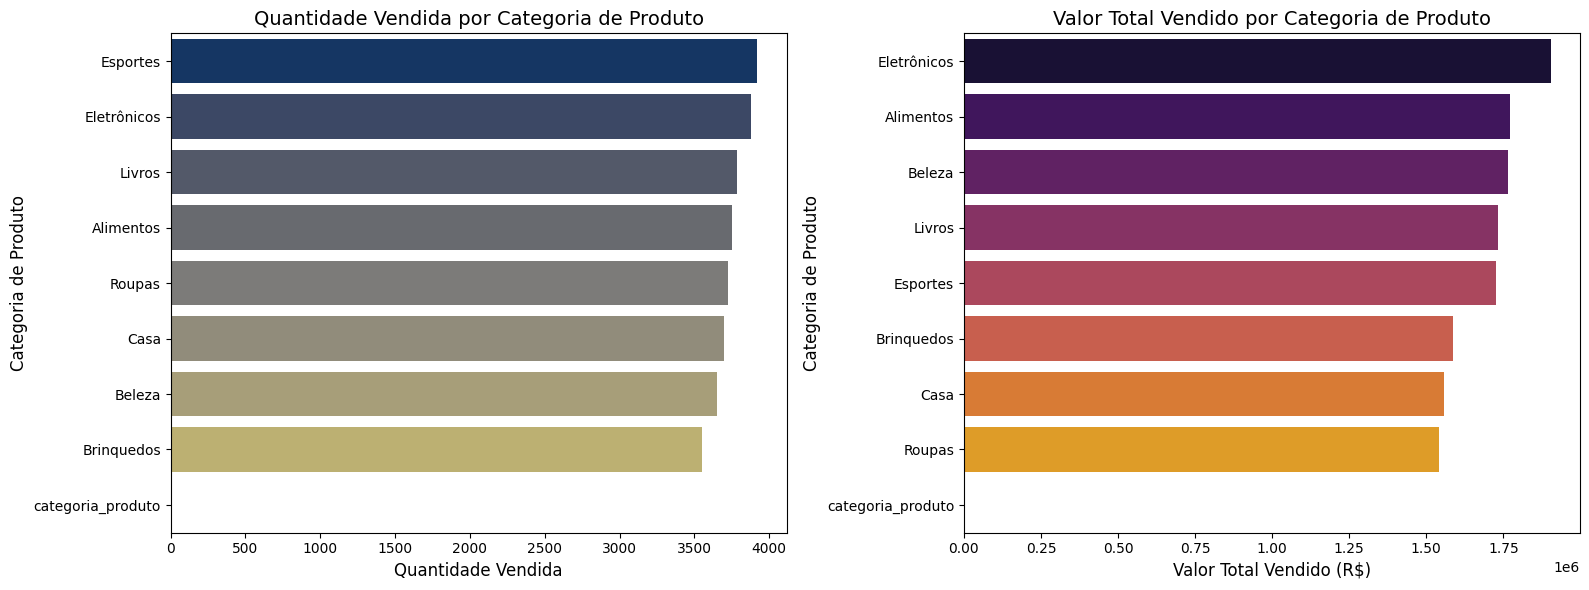

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

#Quantidade Vendida por Categoria de Produto
category_quantity = df.groupby(["categoria_produto"])["quantidade"].sum().sort_values(ascending=False).reset_index()
sns.barplot(x="quantidade", y="categoria_produto", data=category_quantity, ax=axes[0], palette="cividis")
axes[0].set_title("Quantidade Vendida por Categoria de Produto", fontsize=14)
axes[0].set_xlabel("Quantidade Vendida", fontsize=12)
axes[0].set_ylabel("Categoria de Produto", fontsize=12)

#Valor Total Vendido por Categoria de Produto
category_value = df.groupby(["categoria_produto"])["valor_total"].sum().sort_values(ascending=False).reset_index()
sns.barplot(x="valor_total", y="categoria_produto", data=category_value, ax=axes[1], palette="inferno")
axes[1].set_title("Valor Total Vendido por Categoria de Produto", fontsize=14)
axes[1].set_xlabel("Valor Total Vendido (R$)", fontsize=12)
axes[1].set_ylabel("Categoria de Produto", fontsize=12)

plt.tight_layout()
plt.show()

### Análise de Margem de Lucro

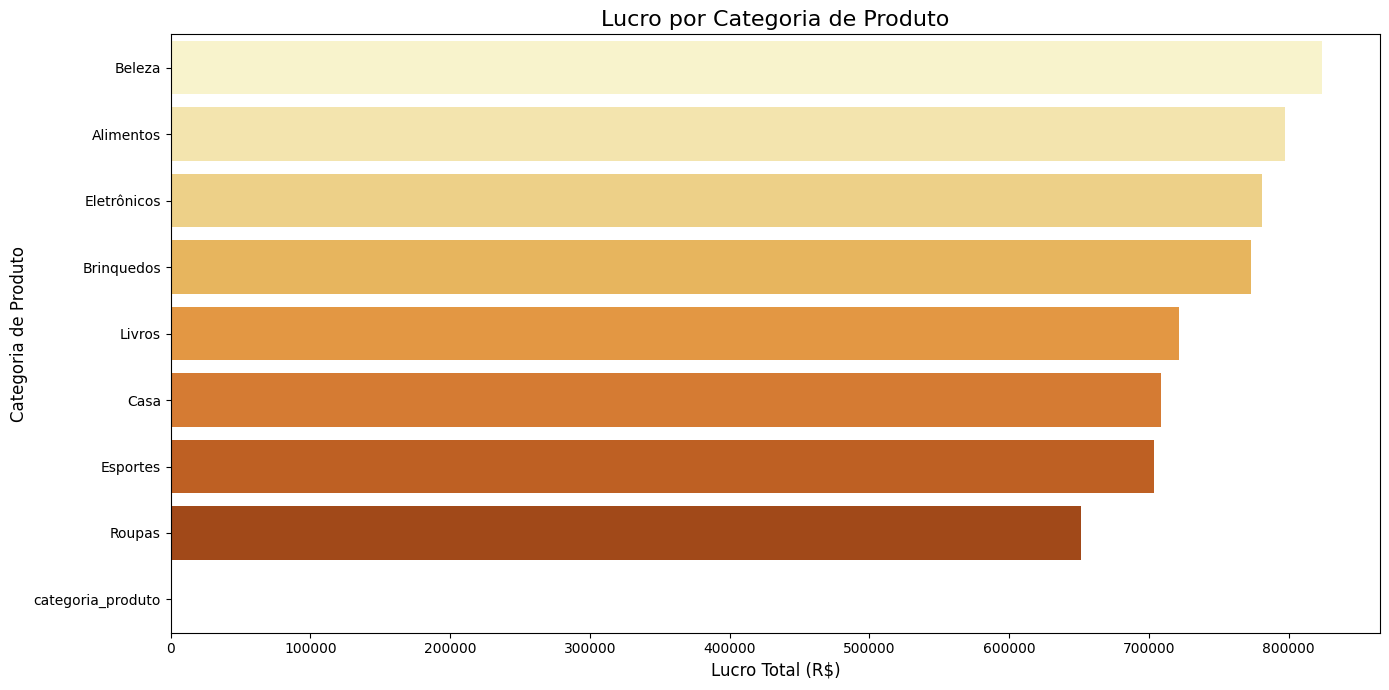

In [ ]:
df['custo'] = pd.to_numeric(df['custo'], errors='coerce')


df["lucro"] = df["valor_total"] - (df["quantidade"] * df["custo"])

plt.figure(figsize=(14, 7))
profit_by_category = df.groupby(["categoria_produto"])["lucro"].sum().sort_values(ascending=False).reset_index()
sns.barplot(x="lucro", y="categoria_produto", data=profit_by_category, palette="YlOrBr")
plt.title("Lucro por Categoria de Produto", fontsize=16)
plt.xlabel("Lucro Total (R$)", fontsize=12)
plt.ylabel("Categoria de Produto", fontsize=12)
plt.tight_layout()
plt.show()

### Análise de Clientes por Valor Gasto

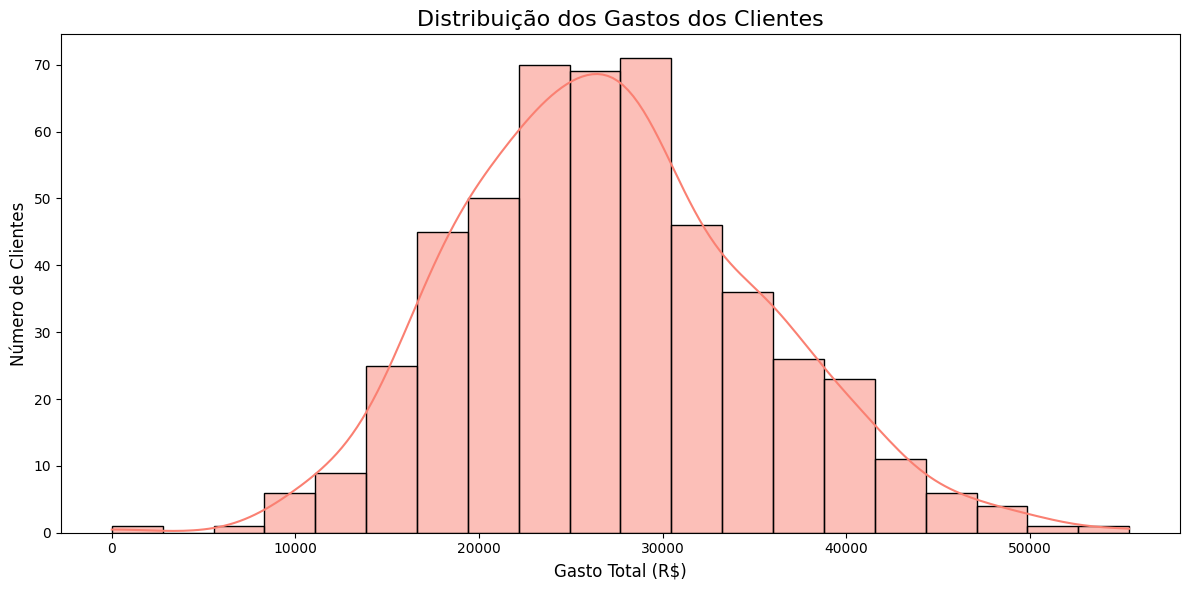

In [ ]:
customer_spending = df.groupby("cliente_id")["valor_total"].sum().reset_index()
customer_spending.columns = ["cliente_id", "gasto_total"]

plt.figure(figsize=(12, 6))
sns.histplot(data=customer_spending, x="gasto_total", bins=20, kde=True, color='salmon')
plt.title("Distribuição dos Gastos dos Clientes", fontsize=16)
plt.xlabel("Gasto Total (R$)", fontsize=12)
plt.ylabel("Número de Clientes", fontsize=12)
plt.tight_layout()
plt.show()